# Packages to be used

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import glob
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths

In [2]:
figs_path  = '../../Codes/Model/Results/'
probs_path = '../../LargeFilesResults/Model/'

# Files to be used in the analysis

In [3]:
all_files = os.listdir(path=probs_path)

In [4]:
probs_files = []
for i in range(len(all_files)):
    prefix = all_files[i].split('.')[0]
    if prefix[:5] == 'prob0' and len(all_files[i])==16:
        probs_files.append(all_files[i])
    else:
        continue
probs_files = np.array(probs_files)
probs_files

array(['prob03_stats.csv', 'prob01_stats.csv', 'prob04_stats.csv',
       'prob02_stats.csv', 'prob05_stats.csv'], dtype='<U16')

# Plots

In [5]:
%matplotlib notebook

In [6]:
# stellar_mass_ini = float(input("Minimum mass?"))

In [7]:
# stellar_mass_fin = float(input("Maximum mass?"))

In [8]:
figsize      = (20, 5)
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
# palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']
palette      = ['grey', '#a6611a','#dfc27d','#80cdc1','#018571']
alpha        = 0.4
fontsize = 15
xlim = [0.05, .36]
ylim = [0, 1.]

<IPython.core.display.Javascript object>


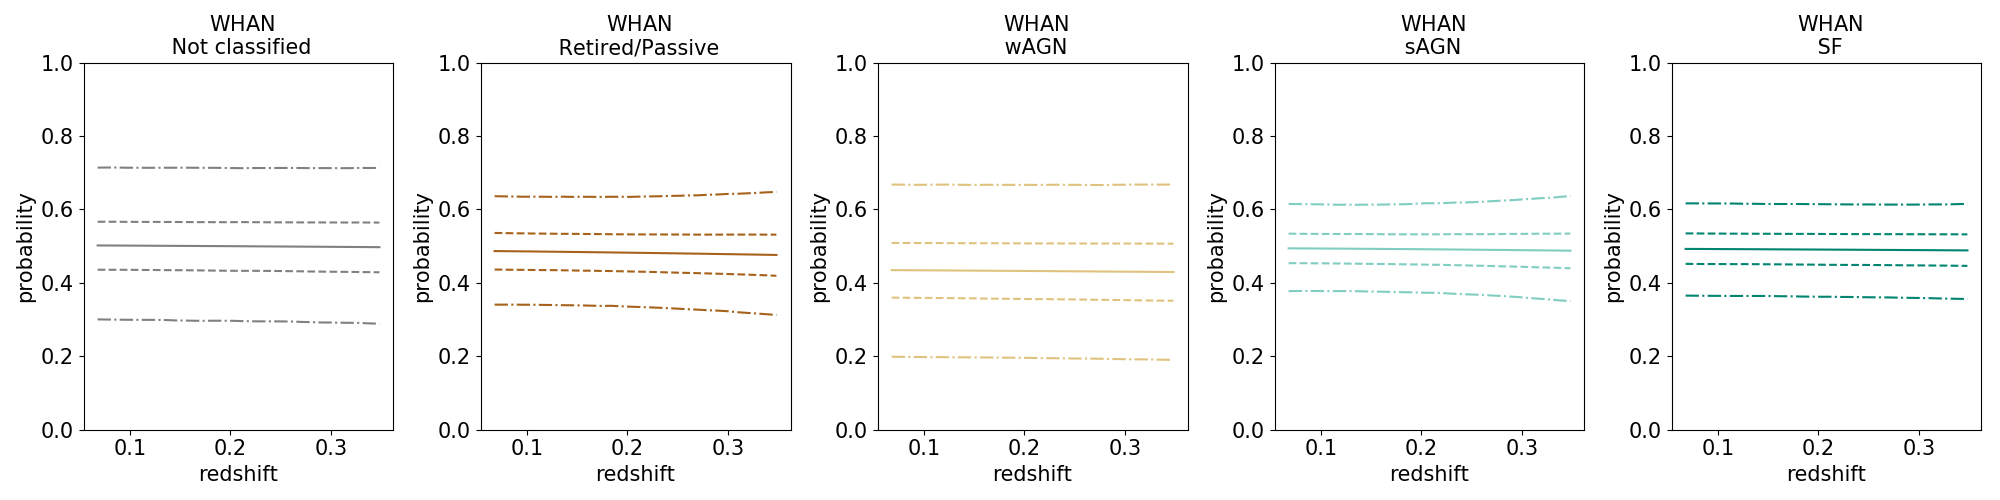

In [10]:
rows     = 1
cols     = probs_files.size
position = 0
plt.subplots(figsize=figsize)
for i in range(cols):
    prob_temp      = pd.read_csv(os.path.join(probs_path, probs_files[i]))
#     data_slice_idx = np.where((prob_temp['LOG_STELLAR_MASS'].values>=stellar_mass_ini)*
#                               (prob_temp['LOG_STELLAR_MASS'].values<=stellar_mass_fin))
    data_slice_idx = np.where(prob_temp['LOG_STELLAR_MASS'].values==11.)
    redshift = prob_temp['Z'].values[data_slice_idx]
    mean     = prob_temp['mean'].values[data_slice_idx]
    perc025  = prob_temp['2.5%'].values[data_slice_idx]
    perc250  = prob_temp['25%'].values[data_slice_idx]
    perc500  = prob_temp['50%'].values[data_slice_idx]
    perc750  = prob_temp['75%'].values[data_slice_idx]
    perc975  = prob_temp['97.5%'].values[data_slice_idx]
    position+=1
    plot = plt.subplot(rows, cols, position)
    plt.plot(redshift, mean, '-', color=palette[i])
    plt.plot(redshift, perc025, '-.', color=palette[i])
    plt.plot(redshift, perc250, '--', color= palette[i])
    plt.plot(redshift, perc750, '--', color=palette[i])
    plt.plot(redshift, perc975, '-.', color=palette[i])
    plt.title("$\,$ WHAN \n %s" % whan_classes[i], fontsize=fontsize)
    plt.xlabel("redshift", fontsize=fontsize)
    plt.ylabel("probability", fontsize=fontsize)
    plt.tick_params('both', labelsize=fontsize)
    plt.ylim(ylim)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'probs_temp.png'))
plt.show()

In [18]:
prob_temp

,Unnamed: 0,probs,median,mean,std,2.5%,25%,50%,75%,97.5%,Z,LOG_STELLAR_MASS
0,0,0,0.383140,0.382601,0.110868,0.172470,0.301582,0.383140,0.464845,0.584238,0.067940,9.0
1,1,1,0.383154,0.382497,0.110884,0.172336,0.301515,0.383154,0.464906,0.584314,0.077608,9.0
2,2,2,0.383022,0.382392,0.110903,0.172156,0.301434,0.383022,0.464969,0.584303,0.087275,9.0
3,3,3,0.382947,0.382285,0.110925,0.172090,0.301212,0.382947,0.465032,0.584403,0.096943,9.0
4,4,4,0.382969,0.382178,0.110949,0.171895,0.300968,0.382969,0.465097,0.584228,0.106610,9.0
5,5,5,0.382926,0.382071,0.110977,0.171528,0.300691,0.382926,0.465163,0.583859,0.116278,9.0
6,6,6,0.382698,0.381962,0.111007,0.171702,0.300487,0.382698,0.465231,0.583812,0.125946,9.0
7,7,7,0.382529,0.381853,0.111041,0.171328,0.300513,0.382529,0.465138,0.583674,0.135613,9.0
8,8,8,0.382391,0.381742,0.111077,0.170916,0.300362,0.382391,0.465015,0.583497,0.145281,9.0
9,9,9,0.382234,0.381632,0.111117,0.170958,0.300193,0.382234,0.464682,0.583501,0.154948,9.0


In [14]:
summary = pd.read_csv('../../LargeFilesResults/Model/fit_summary_sharedprior.csv')

In [15]:
summary

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.2934,0.0071,0.1406,0.0672,0.1799,0.2791,0.4001,0.5622,387,1.0062,0.067940,9.0
1,prob01[2],0.2934,0.0071,0.1406,0.0671,0.1799,0.2788,0.4002,0.5620,387,1.0062,0.077608,9.0
2,prob01[3],0.2933,0.0071,0.1405,0.0671,0.1799,0.2787,0.4005,0.5620,387,1.0062,0.087275,9.0
3,prob01[4],0.2932,0.0071,0.1405,0.0672,0.1798,0.2785,0.4004,0.5619,387,1.0062,0.096943,9.0
4,prob01[5],0.2931,0.0071,0.1405,0.0674,0.1798,0.2785,0.4004,0.5614,387,1.0062,0.106610,9.0
5,prob01[6],0.2931,0.0071,0.1405,0.0674,0.1797,0.2783,0.4004,0.5613,387,1.0062,0.116278,9.0
6,prob01[7],0.2930,0.0071,0.1405,0.0674,0.1798,0.2783,0.4003,0.5613,388,1.0062,0.125946,9.0
7,prob01[8],0.2929,0.0071,0.1404,0.0672,0.1796,0.2783,0.4000,0.5612,388,1.0062,0.135613,9.0
8,prob01[9],0.2928,0.0071,0.1404,0.0671,0.1797,0.2785,0.3998,0.5613,388,1.0062,0.145281,9.0
9,prob01[10],0.2927,0.0071,0.1404,0.0669,0.1795,0.2785,0.3996,0.5611,388,1.0062,0.154948,9.0


<IPython.core.display.Javascript object>


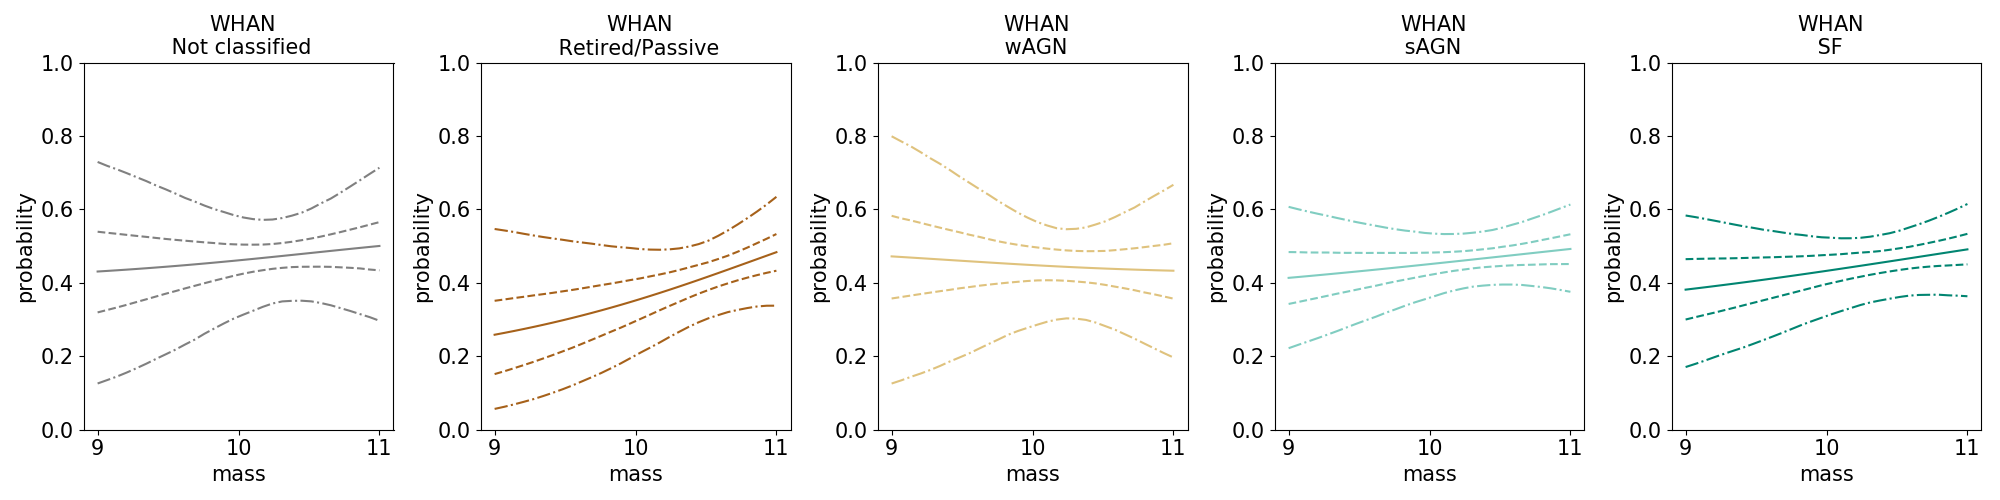

In [16]:
rows     = 1
cols     = probs_files.size
position = 0
plt.subplots(figsize=figsize)
for i in range(cols):
    prob_temp      = pd.read_csv(os.path.join(probs_path, probs_files[i]))
#     data_slice_idx = np.where((prob_temp['LOG_STELLAR_MASS'].values>=stellar_mass_ini)*
#                               (prob_temp['LOG_STELLAR_MASS'].values<=stellar_mass_fin))
    data_slice_idx = np.where(prob_temp['Z'].values==prob_temp['Z'].values[10])
    redshift = prob_temp['Z'].values[data_slice_idx]
    mass     = prob_temp['LOG_STELLAR_MASS'].values[data_slice_idx]
    mean     = prob_temp['mean'].values[data_slice_idx]
    perc025  = prob_temp['2.5%'].values[data_slice_idx]
    perc250  = prob_temp['25%'].values[data_slice_idx]
    perc500  = prob_temp['50%'].values[data_slice_idx]
    perc750  = prob_temp['75%'].values[data_slice_idx]
    perc975  = prob_temp['97.5%'].values[data_slice_idx]
    position+=1
    plot = plt.subplot(rows, cols, position)
    plt.plot(mass, mean, '-', color=palette[i])
    plt.plot(mass, perc025, '-.', color=palette[i])
    plt.plot(mass, perc250, '--', color= palette[i])
    plt.plot(mass, perc750, '--', color=palette[i])
    plt.plot(mass, perc975, '-.', color=palette[i])
    plt.title("$\,$ WHAN \n %s" % whan_classes[i], fontsize=fontsize)
    plt.xlabel("mass", fontsize=fontsize)
    plt.ylabel("probability", fontsize=fontsize)
    plt.tick_params('both', labelsize=fontsize)
    plt.ylim(ylim)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'probs_temp_mass.png'))
plt.show()

In [ ]:
np.unique(prob_temp['Z'].values)

<IPython.core.display.Javascript object>


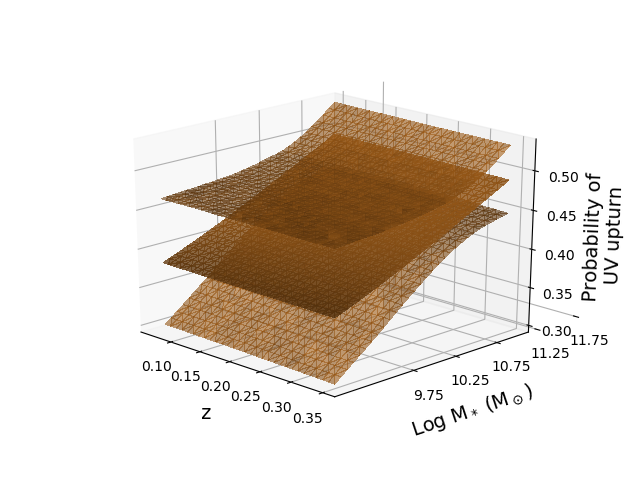

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['mean'], color='#a6611a', alpha=0.8, linewidth=0, antialiased=False)
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['25%'], color='#a6611a', alpha=0.6, linewidth=0, antialiased=False)
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['75%'], color='#a6611a', alpha=0.6, linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
# ax.zaxis.set_rotate_label(False)
# plt.savefig('./../../Figs/logit3D_grid.pdf', dpi=100)

# for ii in xrange(180,360,10):
#     ax.view_init(elev=10., azim=ii)
#     plt.savefig("./Results/movie_short/movie_0%d_0.png" % ii)
    
plt.savefig(os.path.join(figs_path, '3d_sharedprior.png'))

plt.show()

<IPython.core.display.Javascript object>


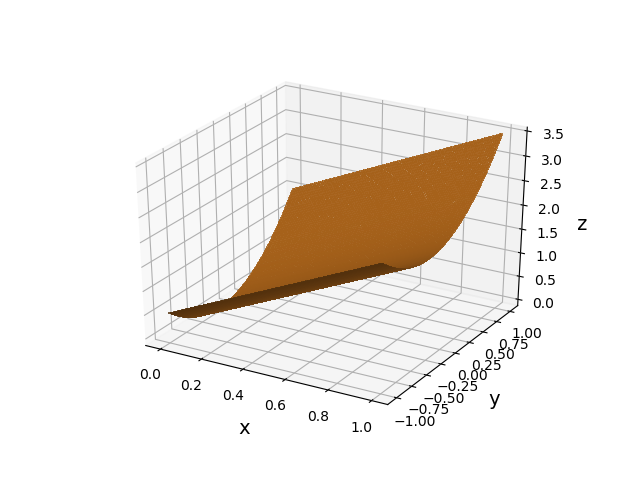

In [44]:
nobs = 100
x1 = np.linspace(0, 1, nobs)
y1 = np.linspace(-1, 1, nobs)
x2, y2 = np.meshgrid(x1, y1)
x2 = x2.reshape((nobs**2), )
y2 = y2.reshape((nobs**2), )

z = 2*np.array(x2) + np.array(y2)**2 + 0.5*np.array(y2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\n x", fontsize=14)
ax.set_ylabel("\n y", fontsize=14)
ax.set_zlabel("\n z", fontsize=14)
ax.plot_trisurf(x2, y2, z, color='#a6611a', alpha=0.8, linewidth=0, antialiased=False)

plt.show()